<a href="https://colab.research.google.com/github/Kammarianand/single-linked-list/blob/main/Transformers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Natural Language Processing

NLP is a field of linguistics and machine learning focused on understanding everything related to human language. The aim of NLP tasks is not only to understand single words individually, but to be able to understand the context of those words.


The following is a list of common NLP tasks, with some examples of each:

* **Classifying whole sentences:** Getting the sentiment of a review, detecting if an email is spam, determining if a sentence is grammatically correct or whether two sentences are logically related or not
* **Classifying each word in a sentence:** Identifying the grammatical components of a sentence (noun, verb, adjective), or the named entities (person, location, organization)
* **Generating text content:** Completing a prompt with auto-generated text, filling in the blanks in a text with masked words
* Extracting an answer from a text: Given a question and a context, extracting the answer to the question based on the information provided in the context
* **Generating a new sentence from an input text:** Translating a text into another language, summarizing a text
NLP isn’t limited to written text though. It also tackles complex challenges in speech recognition and computer vision, such as generating a transcript of an audio sample or a description of an image.

## Why is it challenging?
Computers don’t process information in the same way as humans. For example, when we read the sentence “I am hungry,” we can easily understand its meaning. Similarly, given two sentences such as “I am hungry” and “I am sad,” we’re able to easily determine how similar they are. For machine learning (ML) models, such tasks are more difficult. The text needs to be processed in a way that enables the model to learn from it. And because language is complex, we need to think carefully about how this processing must be done. There has been a lot of research done on how to represent text, and we will look at some methods in the next chapter.

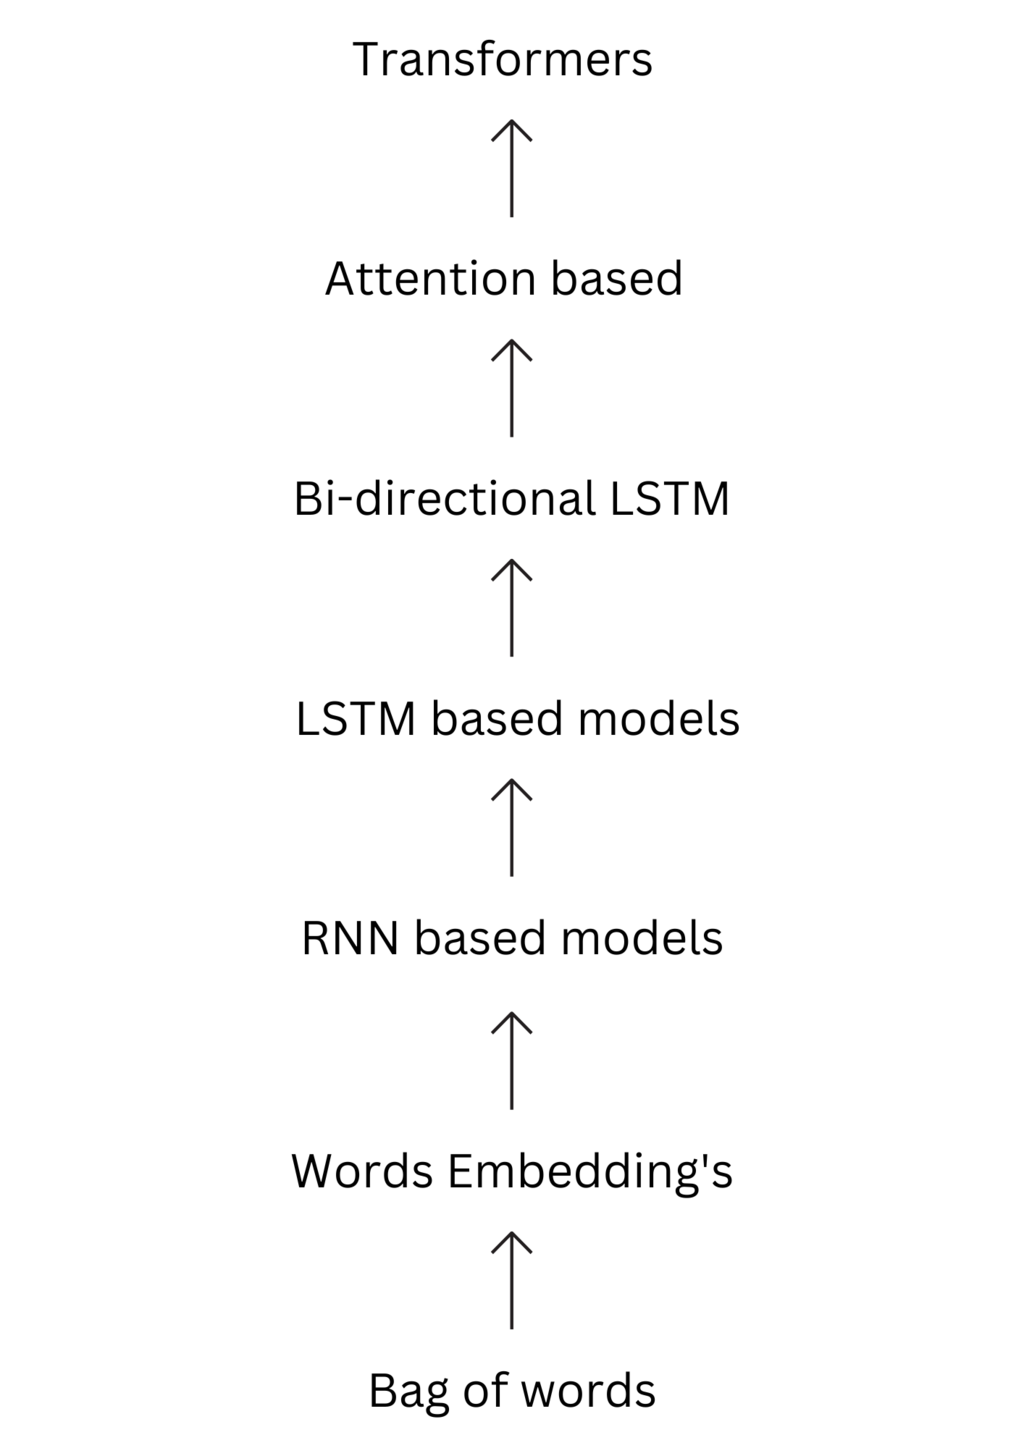

# The HuggingFace library

## The pipeline abstraction

The pipeline function returns an end-to-end obiect that performs an NLP task on one or several texts.

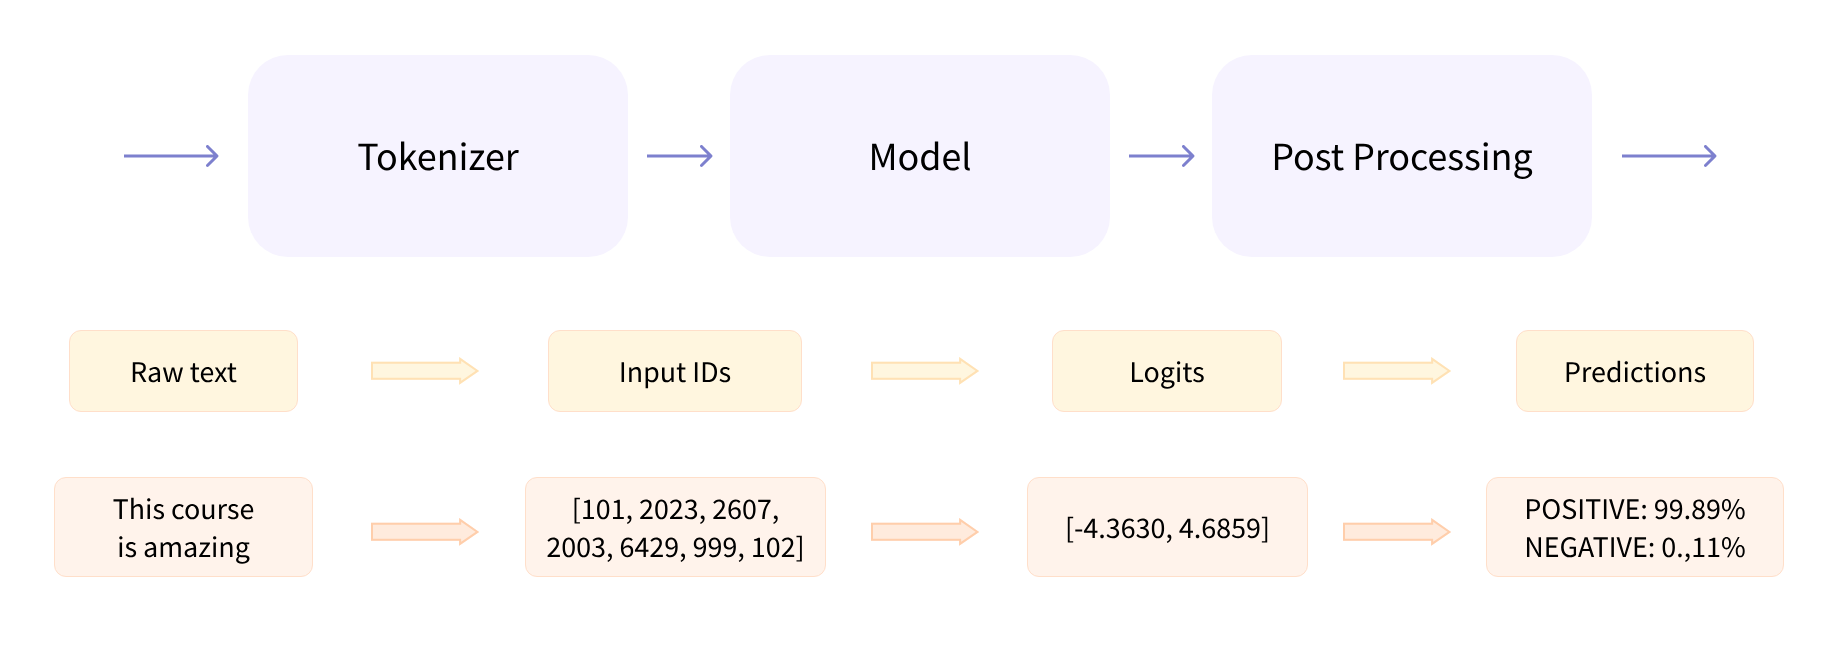

In [ ]:
from transformers import pipeline

classifier = pipeline("sentiment-analysis")
classifier("I've been waiting for a HuggingFace lecture my whole life.")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

[{'label': 'NEGATIVE', 'score': 0.9920022487640381}]

By default, this pipeline selects a particular pretrained model that has been fine-tuned for sentiment analysis in English. The model is downloaded and cached when you create the classifier object. If you rerun the command, the cached model will be used instead and there is no need to download the model again.

There are three main steps involved when you pass some text to a pipeline:

1. The text is preprocessed into a format the model can understand.
2. The preprocessed inputs are passed to the model.
3. The predictions of the model are post-processed, so you can make sense of them.

Some of the currently [available pipelines](https://huggingface.co/transformers/main_classes/pipelines) are:

* feature-extraction (get the vector representation of a text)
* fill-mask
* ner (named entity recognition)
* question-answering
* sentiment-analysis
* summarization
* text-generation
* translation
* zero-shot-classification

### Zero-shot classification
We’ll start by tackling a more challenging task where we need to classify texts that haven’t been labelled. This is a common scenario in real-world projects because annotating text is usually time-consuming and requires domain expertise. For this use case, the zero-shot-classification pipeline is very powerful: it allows you to specify which labels to use for the classification, so you don’t have to rely on the labels of the pretrained model. You’ve already seen how the model can classify a sentence as positive or negative using those two labels — but it can also classify the text using any other set of labels you like.

In [ ]:
from transformers import pipeline

classifier = pipeline("zero-shot-classification")
classifier(
    "This is a lecture about the Transformers library",
    candidate_labels=["education", "politics", "business"],
)

No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

{'sequence': 'This is a lecture about the Transformers library',
 'labels': ['education', 'business', 'politics'],
 'scores': [0.974598228931427, 0.017947658896446228, 0.007454170845448971]}

### Text generation
Now let’s see how to use a pipeline to generate some text. The main idea here is that you provide a prompt and the model will auto-complete it by generating the remaining text. This is similar to the predictive text feature that is found on many phones. Text generation involves randomness, so it’s normal if you don’t get the same results as shown below.

In [ ]:
from transformers import pipeline

generator = pipeline("text-generation")
generator("In this lecture, we will teach you how to")

No model was supplied, defaulted to gpt2 and revision 6c0e608 (https://huggingface.co/gpt2).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'In this lecture, we will teach you how to use Google Chrome to find and navigate to the URL for your website. It is important to note that the URL you used previously will be used later. After you have the link you used earlier in your'}]

### Using any model from the Hub in a pipeline
The previous examples used the default model for the task at hand, but you can also choose a particular model from the Hub to use in a pipeline for a specific task — say, text generation. Go to the [Model Hub](https://huggingface.co/models) and click on the corresponding tag on the left to display only the supported models for that task. You should get to a page like this [one](https://huggingface.co/models?pipeline_tag=text-generation).

In [ ]:
from transformers import pipeline

generator = pipeline("text-generation", model="distilgpt2")
generator(
    "In this lecture, we will teach you how to",
    max_length=30,
    num_return_sequences=2,
)

config.json:   0%|          | 0.00/762 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/353M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'In this lecture, we will teach you how to set up a blog and write about doing things from the ground up.\n\n\nI am trying'},
 {'generated_text': 'In this lecture, we will teach you how to properly make an informed mistake for an investment manager.\n\n\n\n\nPlease make the comments below'}]

### Mask filling
The next pipeline you’ll try is fill-mask. The idea of this task is to fill in the blanks in a given text.

In [ ]:
from transformers import pipeline

unmasker = pipeline("fill-mask")
unmasker("This lecture will teach you all about <mask> models.", top_k=2)

No model was supplied, defaulted to distilroberta-base and revision ec58a5b (https://huggingface.co/distilroberta-base).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/331M [00:00<?, ?B/s]

Some weights of the model checkpoint at distilroberta-base were not used when initializing RobertaForMaskedLM: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

[{'score': 0.24967040121555328,
  'token': 30412,
  'token_str': ' mathematical',
  'sequence': 'This lecture will teach you all about mathematical models.'},
 {'score': 0.04993531480431557,
  'token': 38163,
  'token_str': ' computational',
  'sequence': 'This lecture will teach you all about computational models.'}]

### Named entity recognition
Named entity recognition (NER) is a task where the model has to find which parts of the input text correspond to entities such as persons, locations, or organizations.

In [ ]:
from transformers import pipeline

ner = pipeline("ner", grouped_entities=True)
ner("My name is Sampurn and I work at GeeksForGeeks in Noida.")

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision f2482bf (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/998 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/60.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/token_classification.py:169: UserWarning: `grouped_entities` is deprecated and will be removed in version v5.0.0, defaulted to `aggregation_strategy="simple"` instead.
  warnings.warn(


[{'entity_group': 'PER',
  'score': 0.9981682,
  'word': 'Sampurn',
  'start': 11,
  'end': 18},
 {'entity_group': 'ORG',
  'score': 0.9912936,
  'word': 'GeeksForGeeks',
  'start': 33,
  'end': 46},
 {'entity_group': 'LOC',
  'score': 0.9968684,
  'word': 'Noida',
  'start': 50,
  'end': 55}]

### Question answering
The question-answering pipeline answers questions using information from a given context

In [ ]:
from transformers import pipeline

question_answerer = pipeline("question-answering")
question_answerer(
    question="Where do I work?",
    context="My name is Sampurn and I work at GeeksForGeeks in Noida",
)

No model was supplied, defaulted to distilbert-base-cased-distilled-squad and revision 626af31 (https://huggingface.co/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/473 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/261M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

{'score': 0.5996338129043579,
 'start': 33,
 'end': 46,
 'answer': 'GeeksForGeeks'}

### Summarization
Summarization is the task of reducing a text into a shorter text while keeping all (or most) of the important aspects referenced in the text.

In [ ]:
from transformers import pipeline

summarizer = pipeline("summarization")
summarizer(
    """
    America has changed dramatically during recent years. Not only has the number of
    graduates in traditional engineering disciplines such as mechanical, civil,
    electrical, chemical, and aeronautical engineering declined, but in most of
    the premier American universities engineering curricula now concentrate on
    and encourage largely the study of engineering science. As a result, there
    are declining offerings in engineering subjects dealing with infrastructure,
    the environment, and related issues, and greater concentration on high
    technology subjects, largely supporting increasingly complex scientific
    developments. While the latter is important, it should not be at the expense
    of more traditional engineering.

    Rapidly developing economies such as China and India, as well as other
    industrial countries in Europe and Asia, continue to encourage and advance
    the teaching of engineering. Both China and India, respectively, graduate
    six and eight times as many traditional engineers as does the United States.
    Other industrial countries at minimum maintain their output, while America
    suffers an increasingly serious decline in the number of engineering graduates
    and a lack of well-educated engineers.
"""
)

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/1.80k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

[{'summary_text': ' America has changed dramatically during recent years . The number of engineering graduates in the U.S. has declined in traditional engineering disciplines such as mechanical, civil,    electrical, chemical, and aeronautical engineering . Rapidly developing economies such as China and India continue to encourage and advance the teaching of engineering .'}]

### Translation
For translation, you can use a default model if you provide a language pair in the task name (such as "translation_en_to_fr"), but the easiest way is to pick the model you want to use on the Model Hub.

In [ ]:
from transformers import pipeline

translator = pipeline("translation", model="Helsinki-NLP/opus-mt-fr-en")
translator("Ce cours est produit par GeeksForGeeks.")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.42k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/301M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/802k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/778k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.34M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:197: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


[{'translation_text': 'This course is produced by GeeksForGeeks.'}]

# How do Transformers work?

## A bit of Transformer History

The [Transformer architecture](https://arxiv.org/abs/1706.03762) was introduced in June 2017. The focus of the original research was on translation tasks. This was followed by the introduction of several influential models, including:

* June 2018: [GPT](https://cdn.openai.com/research-covers/language-unsupervised/language_understanding_paper.pdf), the first pretrained Transformer model, used for fine-tuning on various NLP tasks and obtained state-of-the-art results

* October 2018: [BERT](https://arxiv.org/abs/1810.04805), another large pretrained model, this one designed to produce better summaries of sentences (more on this in the next chapter!)

* February 2019: [GPT-2](https://cdn.openai.com/better-language-models/language_models_are_unsupervised_multitask_learners.pdf), an improved (and bigger) version of GPT that was not immediately publicly released due to ethical concerns

* October 2019: [DistilBERT](https://arxiv.org/abs/1910.01108), a distilled version of BERT that is 60% faster, 40% lighter in memory, and still retains 97% of BERT’s performance

* October 2019: [BART](https://arxiv.org/abs/1910.13461) and [T5](https://arxiv.org/abs/1910.10683), two large pretrained models using the same architecture as the original Transformer model (the first to do so)

* May 2020, [GPT-3](https://arxiv.org/abs/2005.14165), an even bigger version of GPT-2 that is able to perform well on a variety of tasks without the need for fine-tuning (called zero-shot learning)

This list is far from comprehensive, and is just meant to highlight a few of the different kinds of Transformer models. Broadly, they can be grouped into three categories:

* GPT-like (also called auto-regressive Transformer models)
* BERT-like (also called auto-encoding Transformer models)
* BART/T5-like (also called sequence-to-sequence Transformer models)

## Most critical things to know about Transformers

### Transformers are language models
All the Transformer models mentioned above (GPT, BERT, BART, T5, etc.) have been trained as language models. This means they have been trained on large amounts of raw text in a self-supervised fashion. Self-supervised learning is a type of training in which the objective is automatically computed from the inputs of the model. That means that humans are not needed to label the data!

This type of model develops a statistical understanding of the language it has been trained on, but it’s not very useful for specific practical tasks. Because of this, the general pretrained model then goes through a process called transfer learning. During this process, the model is fine-tuned in a supervised way — that is, using human-annotated labels — on a given task.


An example of a task is predicting the next word in a sentence having read the n previous words.

Another example is masked language modeling, in which the model predicts a masked word in the sentence.

### Transformers are big models
Apart from a few outliers (like DistilBERT), the general strategy to achieve better performance is by increasing the models’ sizes as well as the amount of data they are pretrained on.

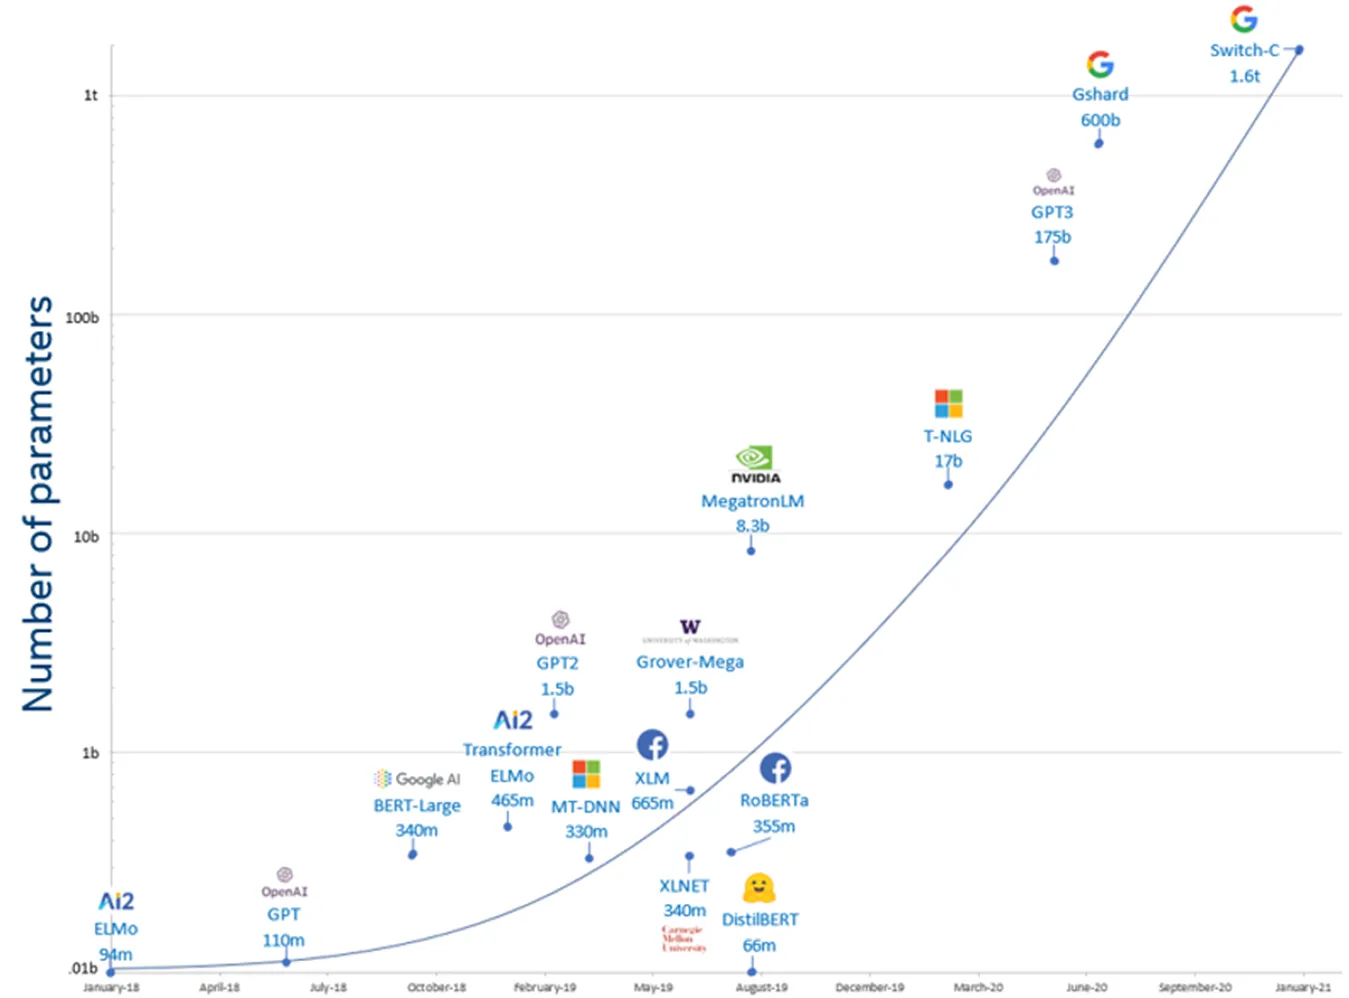

Source: Zoiner Tejada

Unfortunately, training a model, especially a large one, requires a large amount of data. This becomes very costly in terms of time and compute resources. It even translates to environmental impact, as can be seen in the following graph.

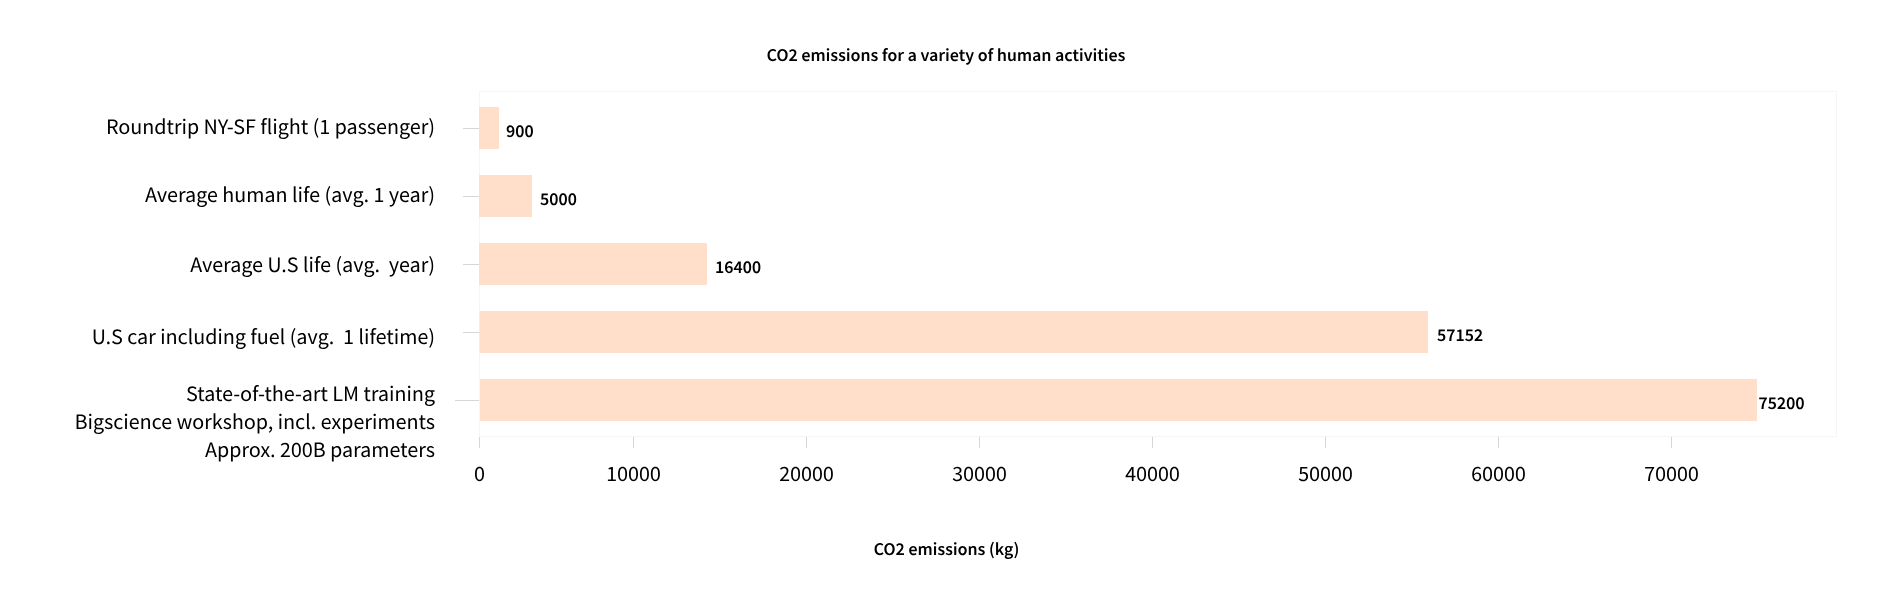

### Transfer Learning

Pretraining is the act of training a model from scratch: the weights are randomly initialized, and the training starts without any prior knowledge.

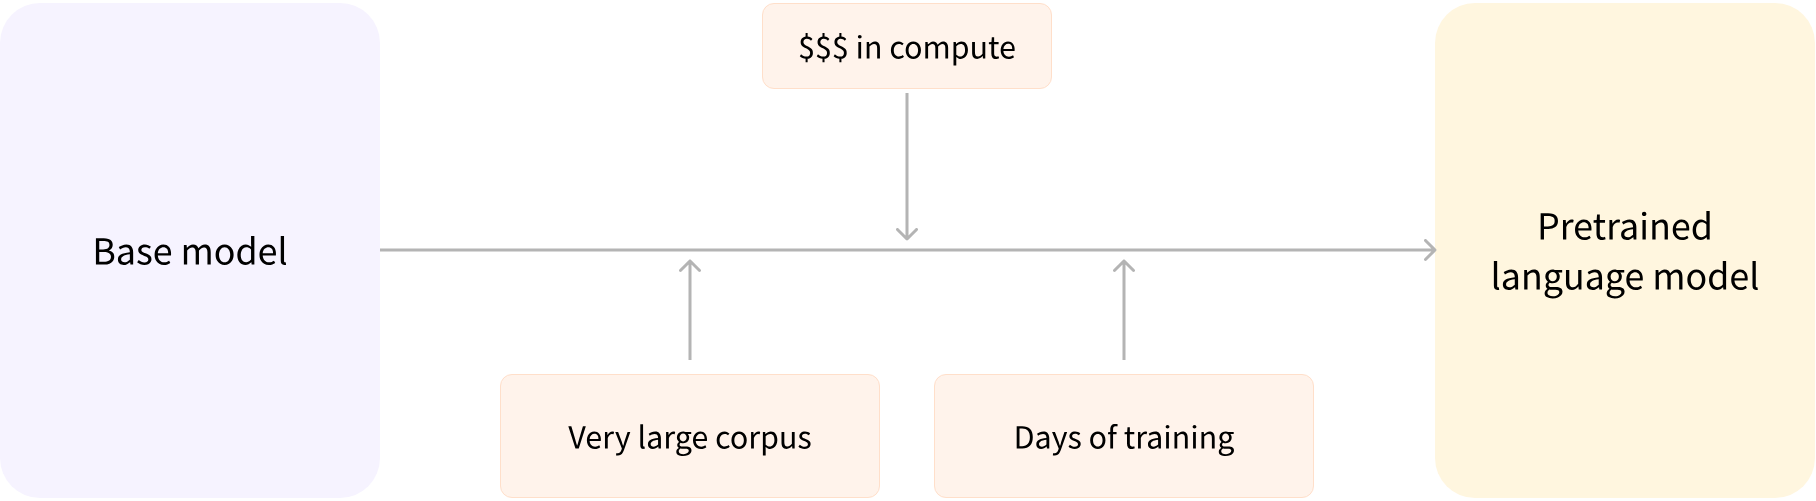


This pretraining is usually done on very large amounts of data. Therefore, it requires a very large corpus of data, and training can take up to several weeks.

Fine-tuning, on the other hand, is the training done after a model has been pretrained. To perform fine-tuning, you first acquire a pretrained language model, then perform additional training with a dataset specific to your task. Wait — why not simply train the model for your final use case from the start (scratch)? There are a couple of reasons:

* The pretrained model was already trained on a dataset that has some similarities with the fine-tuning dataset. The fine-tuning process is thus able to take advantage of knowledge acquired by the initial model during pretraining (for instance, with NLP problems, the pretrained model will have some kind of statistical understanding of the language you are using for your task).
* Since the pretrained model was already trained on lots of data, the fine-tuning requires way less data to get decent results.
* For the same reason, the amount of time and resources needed to get good results are much lower.
For example, one could leverage a pretrained model trained on the English language and then fine-tune it on an arXiv corpus, resulting in a science/research-based model. The fine-tuning will only require a limited amount of data: the knowledge the pretrained model has acquired is “transferred,” hence the term transfer learning.

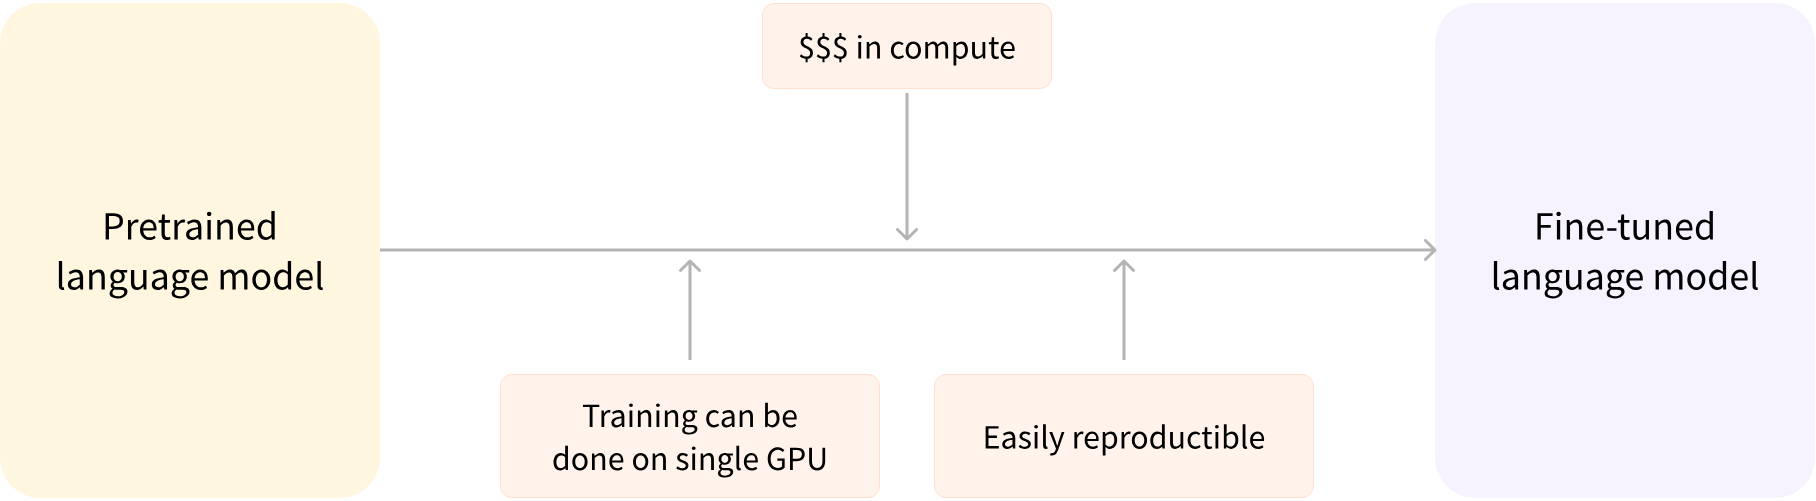

Fine-tuning a model therefore has lower time, data, financial, and environmental costs. It is also quicker and easier to iterate over different fine-tuning schemes, as the training is less constraining than a full pretraining.

This process will also achieve better results than training from scratch (unless you have lots of data), which is why you should always try to leverage a pretrained model — one as close as possible to the task you have at hand — and fine-tune it.

## The Transformer Architecture (explained in steps)

### Encoders & Decoders

The model is primarily composed of two blocks:

* **Encoder (left):** The encoder receives an input and builds a representation of it (its features). This means that the model is optimized to acquire understanding from the input.
* **Decoder (right):** The decoder uses the encoder’s representation (features) along with other inputs to generate a target sequence. This means that the model is optimized for generating outputs.


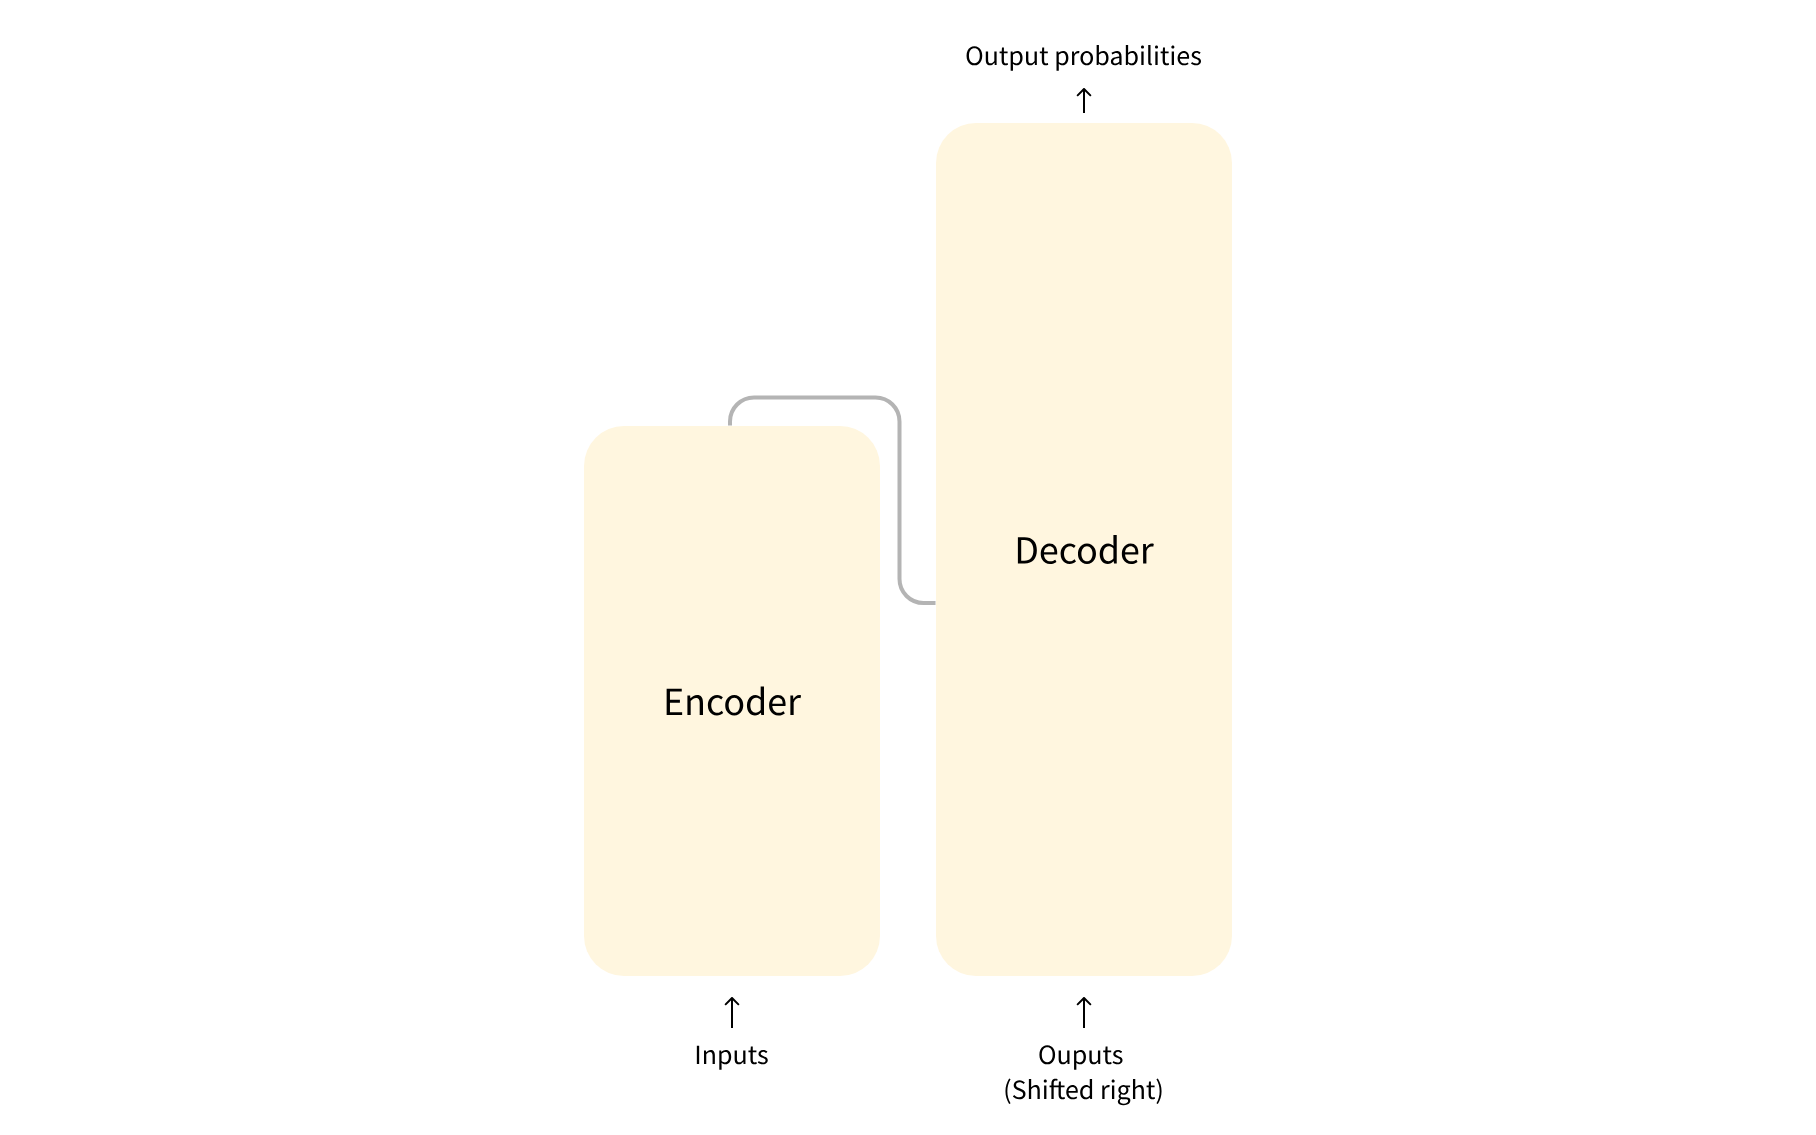


Each of these parts can be used independently, depending on the task:

* Encoder-only models: Good for tasks that require understanding of the input, such as sentence classification and named entity recognition.
* Decoder-only models: Good for generative tasks such as text generation.
* Encoder-decoder models or sequence-to-sequence models: Good for generative tasks that require an input, such as translation or summarization.

### Attention Layers

A key feature of Transformer models is that they are built with special layers called attention layers. After all, [Attention Is All You Need!](https://arxiv.org/abs/1706.03762)

We may explore the details of attention layers later in the course; for now, all you need to know is that this layer will tell the model to pay specific attention to certain words in the sentence you passed it (and more or less ignore the others) when dealing with the representation of each word.

To put this into context, consider the task of translating text from English to French. Given the input “You like this course”, a translation model will need to also attend to the adjacent word “You” to get the proper translation for the word “like”, because in French the verb “like” is conjugated differently depending on the subject. The rest of the sentence, however, is not useful for the translation of that word. In the same vein, when translating “this” the model will also need to pay attention to the word “course”, because “this” translates differently depending on whether the associated noun is masculine or feminine. Again, the other words in the sentence will not matter for the translation of “course”. With more complex sentences (and more complex grammar rules), the model would need to pay special attention to words that might appear farther away in the sentence to properly translate each word.

The same concept applies to any task associated with natural language: **a word by itself has a meaning, but that meaning is deeply affected by the context, which can be any other word (or words) before or after the word being studied**.



### The architecture

The Transformer architecture was originally designed for translation. During training, the encoder receives inputs (sentences) in a certain language, while the decoder receives the same sentences in the desired target language. In the encoder, the attention layers can use all the words in a sentence (since, as we just saw, the translation of a given word can be dependent on what is after as well as before it in the sentence). The decoder, however, works sequentially and can only pay attention to the words in the sentence that it has already translated (so, only the words before the word currently being generated). For example, when we have predicted the first three words of the translated target, we give them to the decoder which then uses all the inputs of the encoder to try to predict the fourth word.

To speed things up during training (when the model has access to target sentences), the decoder is fed the whole target, but it is not allowed to use future words (if it had access to the word at position 2 when trying to predict the word at position 2, the problem would not be very hard!). For instance, when trying to predict the fourth word, the attention layer will only have access to the words in positions 1 to 3.

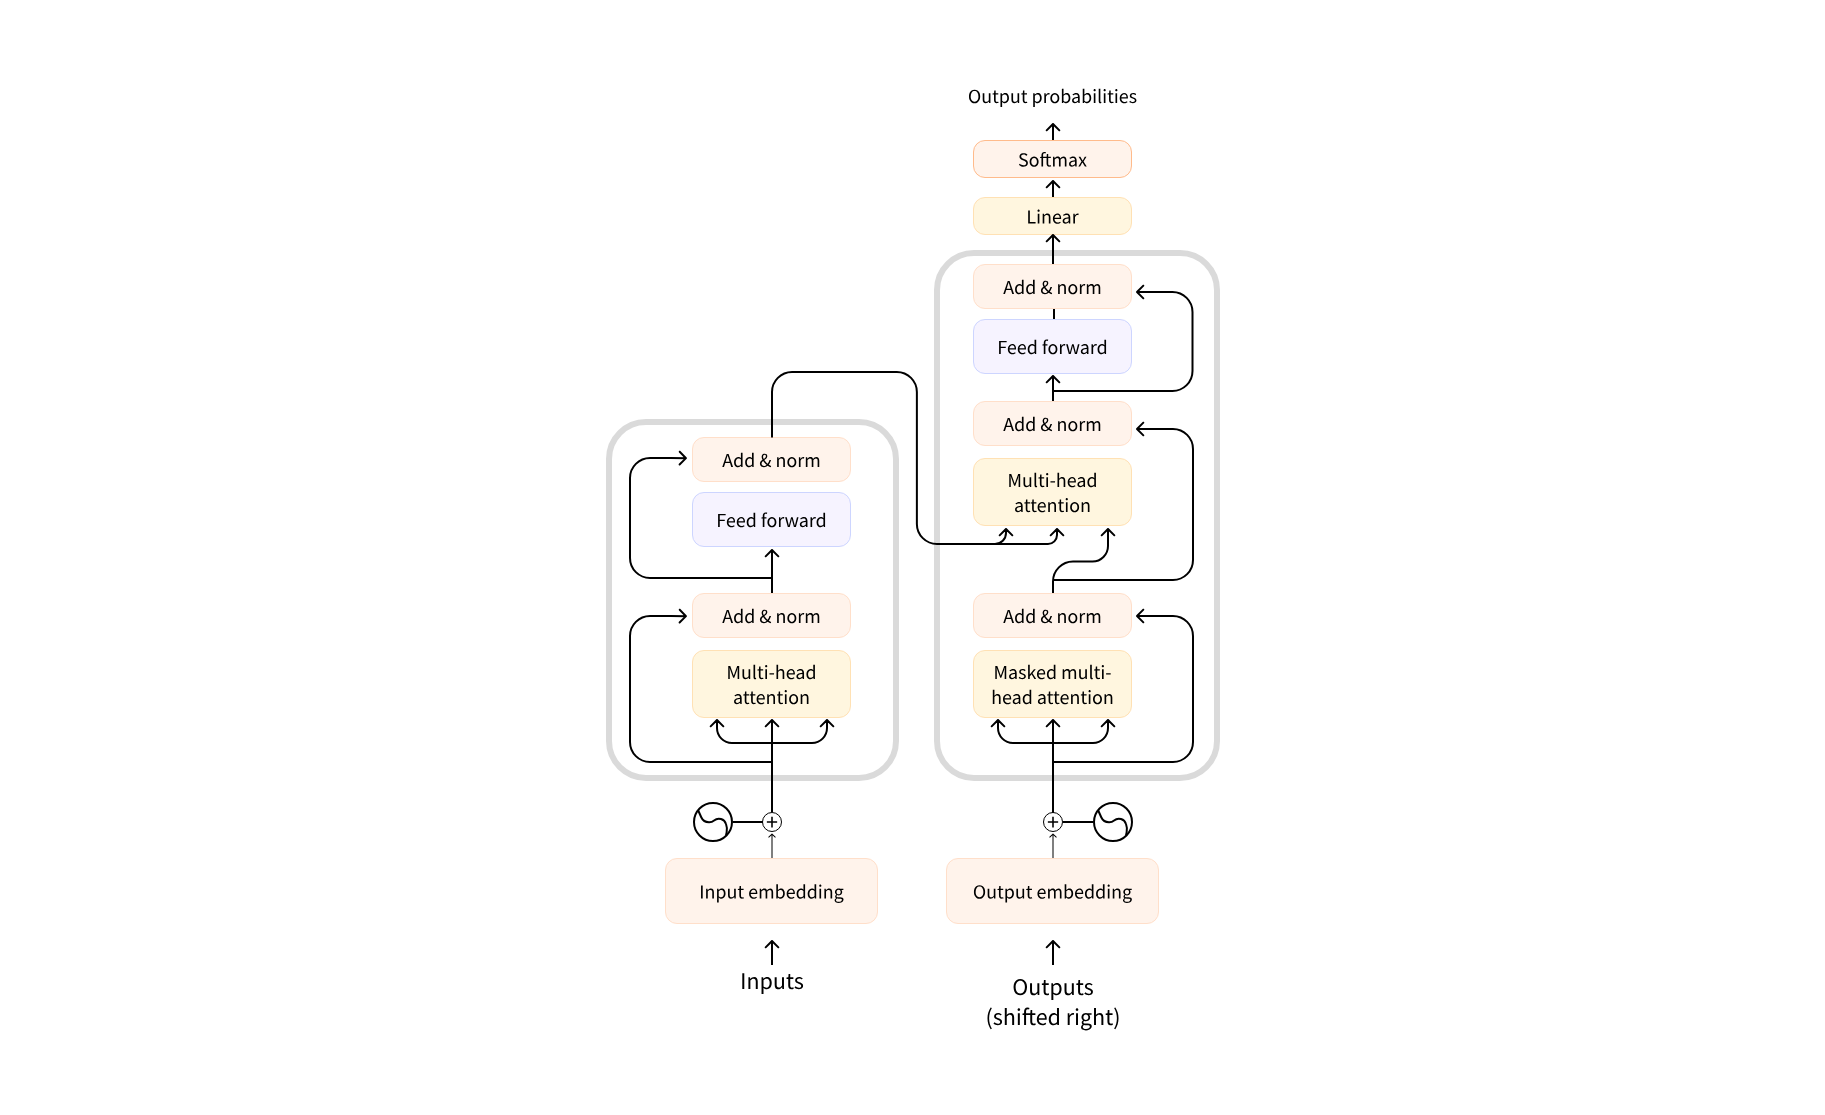

Note that the first attention layer in a decoder block pays attention to all (past) inputs to the decoder, but the second attention layer uses the output of the encoder. It can thus access the whole input sentence to best predict the current word. This is very useful as different languages can have grammatical rules that put the words in different orders, or some context provided later in the sentence may be helpful to determine the best translation of a given word.

The attention mask can also be used in the encoder/decoder to prevent the model from paying attention to some special words — for instance, the special padding word used to make all the inputs the same length when batching together sentences.

# Transformer Categories

## Encoder models
Encoder models use only the encoder of a Transformer model. At each stage, the attention layers can access all the words in the initial sentence. These models are often characterized as having “bi-directional” attention, and are often called auto-encoding models.

The pretraining of these models usually revolves around somehow corrupting a given sentence (for instance, by masking random words in it) and tasking the model with finding or reconstructing the initial sentence.

Encoder models are best suited for tasks requiring an understanding of the full sentence, such as sentence classification, named entity recognition (and more generally word classification), and extractive question answering.

Representatives of this family of models include:

* [ALBERT](https://huggingface.co/docs/transformers/model_doc/albert)
* [BERT](https://huggingface.co/docs/transformers/model_doc/bert)
* [DistilBERT](https://huggingface.co/docs/transformers/model_doc/distilbert)
* [ELECTRA](https://huggingface.co/docs/transformers/model_doc/electra)
* [RoBERTa](https://huggingface.co/docs/transformers/model_doc/roberta)

## Decoder models
Decoder models use only the decoder of a Transformer model. At each stage, for a given word the attention layers can only access the words positioned before it in the sentence. These models are often called auto-regressive models.

The pretraining of decoder models usually revolves around predicting the next word in the sentence.

These models are best suited for tasks involving text generation.

Representatives of this family of models include:

* [CTRL](https://huggingface.co/transformers/model_doc/ctrl)
* [GPT](https://huggingface.co/docs/transformers/model_doc/openai-gpt)
* [GPT-2](https://huggingface.co/transformers/model_doc/gpt2)
* [Transformer XL](https://huggingface.co/transformers/model_doc/transfo-xl)

## Sequence-to-sequence models

Encoder-decoder models (also called sequence-to-sequence models) use both parts of the Transformer architecture. At each stage, the attention layers of the encoder can access all the words in the initial sentence, whereas the attention layers of the decoder can only access the words positioned before a given word in the input.

The pretraining of these models can be done using the objectives of encoder or decoder models, but usually involves something a bit more complex. For instance, T5 is pretrained by replacing random spans of text (that can contain several words) with a single mask special word, and the objective is then to predict the text that this mask word replaces.

Sequence-to-sequence models are best suited for tasks revolving around generating new sentences depending on a given input, such as summarization, translation, or generative question answering.

Representatives of this family of models include:

* [BART](https://huggingface.co/transformers/model_doc/bart)
* [mBART](https://huggingface.co/transformers/model_doc/mbart)
* [Marian](https://huggingface.co/transformers/model_doc/marian)
* [T5](https://huggingface.co/transformers/model_doc/t5)

# BE WARY OF BIAS & LIMITATIONS

In [ ]:
from transformers import pipeline

unmasker = pipeline("fill-mask", model="bert-base-uncased")
result = unmasker("This man works as a [MASK].")
print([r["token_str"] for r in result])

result = unmasker("This woman works as a [MASK].")
print([r["token_str"] for r in result])

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

['carpenter', 'lawyer', 'farmer', 'businessman', 'doctor']
['nurse', 'maid', 'teacher', 'waitress', 'prostitute']


When you use these tools, you need to keep in the back of your mind that the original model you are using could very easily generate sexist, racist, or homophobic content. Fine-tuning the model on your data won’t make this intrinsic bias disappear.

# How to Read a Paper

https://arxiv.org/pdf/1908.08962.pdf

# The first pass

* Quick scan to get bird’s eye view of the paper
* This Pass should take 5 to 10 Minutes
* Carefully read the title, abstract, and introduction. Identify whether this paper is relevant to your problem statement.
* Read section and sub – section headings, but ignore everything else
* Read the conclusions. Identify the performance of the solution in the paper.

At the end of the first pass, you should be able to answer the five Cs:

* Category
* Context
* Correctness
* Contributions
* Clarity

## The Second Pass

* The Second Pass should take up to an hour
* Read the paper with greater care but ignore details such as proofs.
* Jot down the key points or make comments in the margins.
* Look carefully at the figures, diagrams, graphs, and other illustrations in the paper (to separate rushed, shoddy work from truly excellent). *Look for github repository or model hub links!*
* After this pass one should be able to summarize the main thrust of the paper.

## The Third Pass​

* This Pass can take about 1 to 15 days for beginners.​

* The key to the third pass is to attempt to virtually re-implement the paper: that is, making the same assumptions as the authors, re-create the work.​

* By comparing this re-creation with actual paper, one can easily identify not only a paper’s innovation, but also its hidden failings and assumptions.

# Finetuning a PreTrained Model

In [ ]:
checkpoint = "bert-base-uncased"

The 🤗 Datasets library provides a very simple command to download and cache a dataset on the Hub. We can download the [MRPC](https://huggingface.co/datasets/SetFit/mrpc/viewer) dataset like this:

In [ ]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.7/536.7 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.7 MB/s eta 0:00:00


In [ ]:
from datasets import load_dataset

raw_datasets = load_dataset("glue", "mrpc")
raw_datasets

Generating train split:   0%|          | 0/1018291 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2999 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/3005 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['translation'],
        num_rows: 1018291
    })
    validation: Dataset({
        features: ['translation'],
        num_rows: 2999
    })
    test: Dataset({
        features: ['translation'],
        num_rows: 3005
    })
})

As you can see, we get a DatasetDict object which contains the training set, the validation set, and the test set. Each of those contains several columns (sentence1, sentence2, label, and idx) and a variable number of rows, which are the number of elements in each set (so, there are 3,668 pairs of sentences in the training set, 408 in the validation set, and 1,725 in the test set).

We can access each pair of sentences in our raw_datasets object by indexing, like with a dictionary:



In [ ]:
raw_train_dataset = raw_datasets["train"]
cs0 = raw_train_dataset[0]['translation']['cs']
en0 = raw_train_dataset[0]['translation']['en']

print(cs0)
print(en0)

Následný postup na základě usnesení Parlamentu: viz zápis
Action taken on Parliament's resolutions: see Minutes


We can see the labels are already integers, so we won’t have to do any preprocessing there. To know which integer corresponds to which label, we can inspect the features of our raw_train_dataset. This will tell us the type of each column:

In [ ]:
raw_train_dataset.features

{'sentence1': Value(dtype='string', id=None),
 'sentence2': Value(dtype='string', id=None),
 'label': ClassLabel(names=['not_equivalent', 'equivalent'], id=None),
 'idx': Value(dtype='int32', id=None)}

## Preprocessing a dataset


To preprocess the dataset, we need to convert the text to numbers the model can make sense of. As you saw yesterday, this is done with a tokenizer. We can feed the tokenizer one sentence or a list of sentences, so we can directly tokenize all the first sentences and all the second sentences of each pair like this:

In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained(checkpoint)
tokenized_sentences_1 = tokenizer(raw_datasets["train"]["sentence1"])
tokenized_sentences_2 = tokenizer(raw_datasets["train"]["sentence2"])

In [ ]:
inputs = tokenizer("This is the first sentence.", "This is the second one.")
inputs

{'input_ids': [101, 2023, 2003, 1996, 2034, 6251, 1012, 102, 2023, 2003, 1996, 2117, 2028, 1012, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [ ]:
tokenizer.convert_ids_to_tokens(inputs["input_ids"])

['[CLS]',
 'this',
 'is',
 'the',
 'first',
 'sentence',
 '.',
 '[SEP]',
 'this',
 'is',
 'the',
 'second',
 'one',
 '.',
 '[SEP]']

We can feed the tokenizer a list of pairs of sentences by giving it the list of first sentences, then the list of second sentences. So, one way to preprocess the training dataset is:

In [ ]:
tokenized_dataset = tokenizer(
    raw_datasets["train"]["sentence1"],
    raw_datasets["train"]["sentence2"],
    padding=True,
    truncation=True,
)

This works well, but it has the disadvantage of returning a dictionary (with our keys, input_ids, attention_mask, and token_type_ids, and values that are lists of lists).

To keep the data as a dataset, we will use the Dataset.map() method. This also allows us some extra flexibility, if we need more preprocessing done than just tokenization. The map() method works by applying a function on each element of the dataset, so let’s define a function that tokenizes our inputs:

In [ ]:
def tokenize_function(example):
    return tokenizer(example["sentence1"], example["sentence2"], truncation=True)

In [ ]:
tokenized_datasets = raw_datasets.map(tokenize_function, batched=True)
tokenized_datasets

Map:   0%|          | 0/408 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 3668
    })
    validation: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 408
    })
    test: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 1725
    })
})

**Dynamic Padding**


The function that is responsible for putting together samples inside a batch is called a collate function.

To do this in practice, we have to define a collate function that will apply the correct amount of padding to the items of the dataset we want to batch together. Fortunately, the 🤗 Transformers library provides us with such a function via DataCollatorWithPadding. It takes a tokenizer when you instantiate it (to know which padding token to use, and whether the model expects padding to be on the left or on the right of the inputs) and will do everything you need:

In [ ]:
from transformers import DataCollatorWithPadding

data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

To test this new toy, let’s grab a few samples from our training set that we would like to batch together. Here, we remove the columns idx, sentence1, and sentence2 as they won’t be needed and contain strings (and we can’t create tensors with strings) and have a look at the lengths of each entry in the batch:

In [ ]:
samples = tokenized_datasets["train"][:8]
samples = {k: v for k, v in samples.items() if k not in ["idx", "sentence1", "sentence2"]}
[len(x) for x in samples["input_ids"]]

[50, 59, 47, 67, 59, 50, 62, 32]

No surprise, we get samples of varying length, from 32 to 67. Dynamic padding means the samples in this batch should all be padded to a length of 67, the maximum length inside the batch. Without dynamic padding, all of the samples would have to be padded to the maximum length in the whole dataset, or the maximum length the model can accept. Let’s double-check that our data_collator is dynamically padding the batch properly:

In [ ]:
batch = data_collator(samples)
{k: v.shape for k, v in batch.items()}

{'input_ids': torch.Size([8, 67]),
 'token_type_ids': torch.Size([8, 67]),
 'attention_mask': torch.Size([8, 67]),
 'labels': torch.Size([8])}

In [ ]:
!pip3 install -q -U accelerate==0.27.2
!pip3 install -q -U datasets==2.17.0
!pip3 install -q -U transformers==4.38.1

## Training the Model

The first step before we can define our Trainer is to define a TrainingArguments class that will contain all the hyperparameters the Trainer will use for training and evaluation. The only argument you have to provide is a directory where the trained model will be saved, as well as the checkpoints along the way. For all the rest, you can leave the defaults, which should work pretty well for a basic fine-tuning.

In [ ]:
from transformers import TrainingArguments
help(TrainingArguments)

In [ ]:
from transformers import TrainingArguments

training_args = TrainingArguments("sample-model-name")

The second step is to define our model.

In [ ]:
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels=2)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


This warning is because BERT has not been pretrained on classifying pairs of sentences, so the head of the pretrained model has been discarded and a new head suitable for sequence classification has been added instead. The warnings indicate that some weights were not used (the ones corresponding to the dropped pretraining head) and that some others were randomly initialized (the ones for the new head). It concludes by encouraging you to train the model, which is exactly what we are going to do now.

Once we have our model, we can define a Trainer by passing it all the objects constructed up to now — the model, the training_args, the training and validation datasets, our data_collator, and our tokenizer:

In [ ]:
from transformers import Trainer

trainer = Trainer(
    model,
    training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["validation"],
    data_collator=data_collator,
    tokenizer=tokenizer,
)

To fine-tune the model on our dataset, we just have to call the train() method of our Trainer:



In [ ]:
trainer.train()

Step,Training Loss
500,0.510600
1000,0.264500


TrainOutput(global_step=1377, training_loss=0.3170327136026575, metrics={'train_runtime': 231.3584, 'train_samples_per_second': 47.563, 'train_steps_per_second': 5.952, 'total_flos': 405114969714960.0, 'train_loss': 0.3170327136026575, 'epoch': 3.0})

 To get some predictions from our model, we can use the Trainer.predict() command:

In [ ]:
predictions = trainer.predict(tokenized_datasets["validation"])
print(predictions.predictions.shape, predictions.label_ids.shape)

(408, 2) (408,)


The output of the predict() method is another named tuple with three fields: predictions, label_ids, and metrics. The metrics field will just contain the loss on the dataset passed, as well as some time metrics (how long it took to predict, in total and on average). Once we complete our compute_metrics() function and pass it to the Trainer, that field will also contain the metrics returned by compute_metrics().

As you can see, predictions is a two-dimensional array with shape 408 x 2 (408 being the number of elements in the dataset we used). Those are the logits for each element of the dataset we passed to predict() (as you saw yesterday, all Transformer models return logits). To transform them into predictions that we can compare to our labels, we need to take the index with the maximum value on the second axis:



In [ ]:
import numpy as np

preds = np.argmax(predictions.predictions, axis=-1)

In [ ]:
!pip install evaluate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 3.0 MB/s eta 0:00:00


We can now compare those preds to the labels. To build our compute_metric() function, we will rely on the metrics from the 🤗 Evaluate library. We can load the metrics associated with the MRPC dataset as easily as we loaded the dataset, this time with the evaluate.load() function. The object returned has a compute() method we can use to do the metric calculation:

In [ ]:
import evaluate

metric = evaluate.load("glue", "mrpc")
metric.compute(predictions=preds, references=predictions.label_ids)

{'accuracy': 0.8651960784313726, 'f1': 0.9063032367972743}

Wrapping everything together, we get our compute_metrics() function:

In [ ]:
def compute_metrics(eval_preds):
    metric = evaluate.load("glue", "mrpc")
    logits, labels = eval_preds
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

And to see it used in action to report metrics at the end of each epoch, here is how we define a new Trainer with this compute_metrics() function:

In [ ]:
training_args = TrainingArguments("test-trainer", evaluation_strategy="epoch")
model = AutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels=2)

trainer = Trainer(
    model,
    training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["validation"],
    data_collator=data_collator,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,F1
1,No log,0.420769,0.823529,0.883117
2,0.535300,0.550844,0.838235,0.886598
3,0.311900,0.722821,0.840686,0.891847


Checkpoint destination directory test-trainer/checkpoint-500 already exists and is non-empty. Saving will proceed but saved results may be invalid.
Checkpoint destination directory test-trainer/checkpoint-1000 already exists and is non-empty. Saving will proceed but saved results may be invalid.


TrainOutput(global_step=1377, training_loss=0.3553826769106442, metrics={'train_runtime': 222.3581, 'train_samples_per_second': 49.488, 'train_steps_per_second': 6.193, 'total_flos': 405114969714960.0, 'train_loss': 0.3553826769106442, 'epoch': 3.0})